In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def predict_raw(self, X):
        return X @ self.weights + self.bias

    def predict(self, X):
        linear_output = self.predict_raw(X)
        return (linear_output >= 0).astype(int)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            for i in range(n_samples):
                linear_output = X[i] @ self.weights + self.bias
                y_pred = 1 if linear_output >= 0 else 0
                update = self.learning_rate * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update


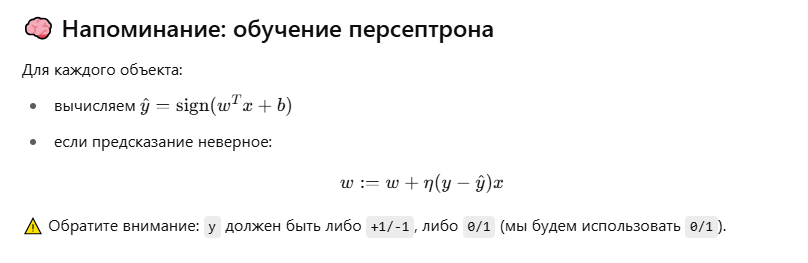

In [3]:
from IPython.display import Image
Image('perc.png')

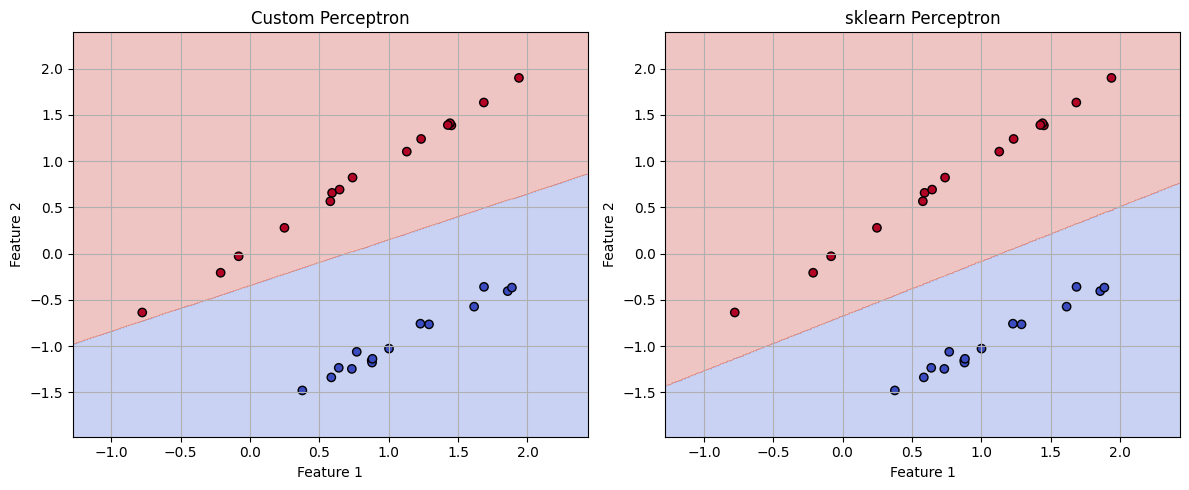

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron as SkPerceptron
import matplotlib.pyplot as plt

# --- Данные (2D, бинарные классы) ---
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Обучаем нашу модель ---
my_perceptron = Perceptron(learning_rate=0.1, max_iter=100)
my_perceptron.fit(X_train, y_train)

# --- Обучаем sklearn ---
sk_perceptron = SkPerceptron(max_iter=1000, tol=1e-3)
sk_perceptron.fit(X_train, y_train)

# --- Визуализация ---
def plot_decision_boundary(model, X, y, title, is_custom=True):
    h = 0.01
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(my_perceptron, X_test, y_test, "Custom Perceptron")

plt.subplot(1, 2, 2)
plot_decision_boundary(sk_perceptron, X_test, y_test, "sklearn Perceptron")

plt.tight_layout()
plt.show()
